# NOTEBOOK 16 Recursion
---

## What is recusion?

Some problems are recursive in nature. What we mean with this is that the problem can be defined in terms of a simpler form of the same problem. An example is the computation of the factorial of a number. The factorial of a natural number $n$ is defined as the product of all positive integers smaller or equal to $n$:

$$ n!=n \times (n-1)\times(n-2)\times...\times2 \times1$$

But the product $(n-1)\times(n-2)\times...\times2\times 1$ is just equal to the factorial of $n-1$, which means that we can write the factorial of $n$ as $n$ times the factorial of $n-1$. 

$$ n! = n\times (n-1)! $$

In other words to solve the problem of $n!$ we need to solve a simpler version of the problem: $(n-1)!$. But to solve $(n-1)!$ we have to compute an even simpler version of the problem: $(n-2)!$. This is the essence of a recursive nature of the problem. You might wonder that the recursive iterations never stop. To compute $(n-2)!$ we need $(n-3)!$; to compute $(n-3)!$ we need $(n-4)!$; and so on. The solution to this is that at one moment the problem is simplified so much that the solution becomes either trivial or is defined. In the case of a factorial we know that $0! = 1$, so as soon as you need to compute $0!$ you write down 1 rather than continuing with $(-1)!$ etc. The definition $0! = 1$ is called the \textbf{base}-case. It prevents an infinite repetition of the recursive relation.


## A Python example.

As in most programming languages Python supports the definition of recursive functions. Recursive functions are defined in terms of their self in a similar fashion as the recursive definition of the factorial is defined in terms of the factorial. Staying with the example of a factorial, a recursive implementation of a function that computes the factorial of an natural number $n$ is the following.


In [3]:
import numpy as np


# example

def factorial(n):
    """
    computes and returns the factorial of n. 
    """
    
    # Base case: We know that 0! = 1 so if n == 0 we return 1
    if n==0:
        return 1
    
    # Recursive relation: for any other value of n we have n!= n*(n-1)!
    f = n * factorial(n - 1)
    
    return f

This function is recursive because to calculate `factorial(n)` it calls itself with the argument `n - 1`. We will not get problems with conflicting variable names because each time the function is called, a new namespace specifically for that function call is created. The **base**-case is implemented as a conditional expression that detects the end of the recursive procedure and makes sure that the function does not infinitely keeps calling itself. Here the base case is when `n==0`. When the function is called with `n = 0` the function just returns 1. Executing the function with `n = 5` gives the expected output. 

In [2]:
factorial(5)

120

## Your turn.

---
**Assignment 1**

The quantum mechanical wavefunction of a particle in a 1D harmonic potential well is given by the following expression:

$$ \Psi_n (x) \propto \frac{1}{\sqrt{2^n n!}} e^{-\frac{x^2}{2}} H_n(x) $$ 

The functions $H_n(x)$ are the Hermite polynomials and are given by:

$$ \begin{matrix}H_0(x)=1\\H_1(x)=2x\\H_2(x)=4x^2-2\\H_3(x)=8x^3-12x\\H_4(x)=16x^4-48x^2+12\end{matrix} $$

The Hermite polynomials show a recursive relation:

$$ H_n(x) = 2xH_{n-1}(x) - 2(n-1)H_{n-2}(x) $$

First we use the **recursive** relation to calculate the Hermite polynomials.

Write a recursive function `hermite_poly(n, x)` that returns the value of the `n`-th Hermite polynomial function evaluated at `x`. 

Important note: the recusive relation has 2 base cases: for `n=0` and `n=1`. Can you think of why having just one base case for `n=0` will not work?

In [4]:
# =============== YOUR CODE GOES HERE =================

def hermite_poly(n,x):
    if n == 0:
        return 1 + x/x -1
    if n == 1:
        return 2 * x
    else:   
        return 2 * x * hermite_poly(n-1, x) - 2 * (n - 1) * hermite_poly(n-2, x)        


hermite_poly(2,3)

34.0

---
**Assignment 2**

Use your function `hermite_poly()` to plot the wavefunctions of the first 5 orders (n=0,1,2,3,4) on the interval from $x = -10$ to $x = 10$.

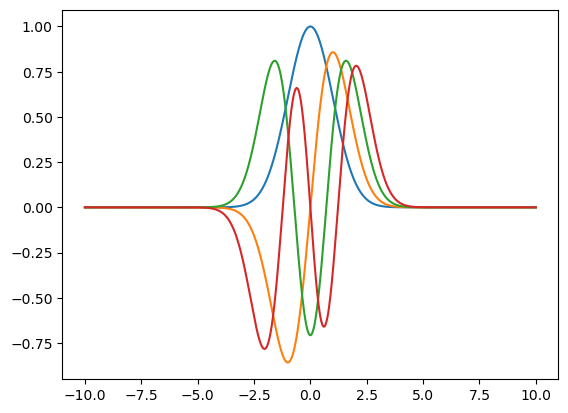

In [13]:
# =============== YOUR CODE GOES HERE =================
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 1000)
for i in range(0, 4):
    z = 1/np.sqrt((2**i)*factorial(i))*np.exp(0.5*-x**2)
    plt.plot(x, z*hermite_poly(i,x))

plt.show()
    